In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/audi.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

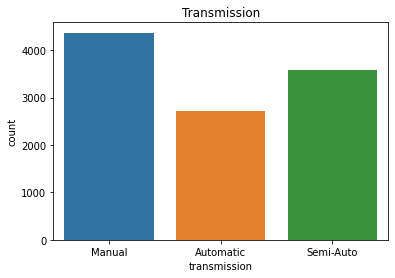

In [11]:
sns.countplot(x='transmission',data=df)
plt.title('Transmission')
plt.show()

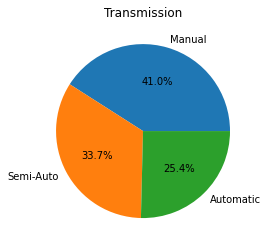

In [15]:
tags = df['transmission'].value_counts()
tags.plot(kind='pie',autopct = '%1.1f%%',label='')
plt.title('Transmission')
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('gold','red','yellowgreen')
wp = {'linewidth':2,'edgecolor':"black"}
tags = df['transmission'].value_counts()
explode={0.1,0.1,0.1}
tags.plot(kind='pie',autopct = '%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Transmission')
plt.show()

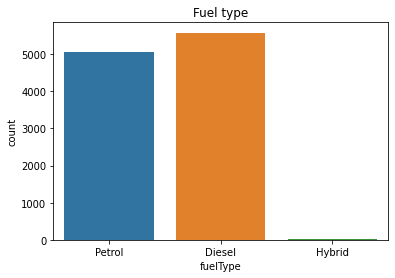

In [17]:
sns.countplot(x='fuelType',data=df)
plt.title("Fuel type")
plt.show()

In [18]:
df['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [19]:
fueltype = df['fuelType']
transmission = df['transmission']
price = df['price']

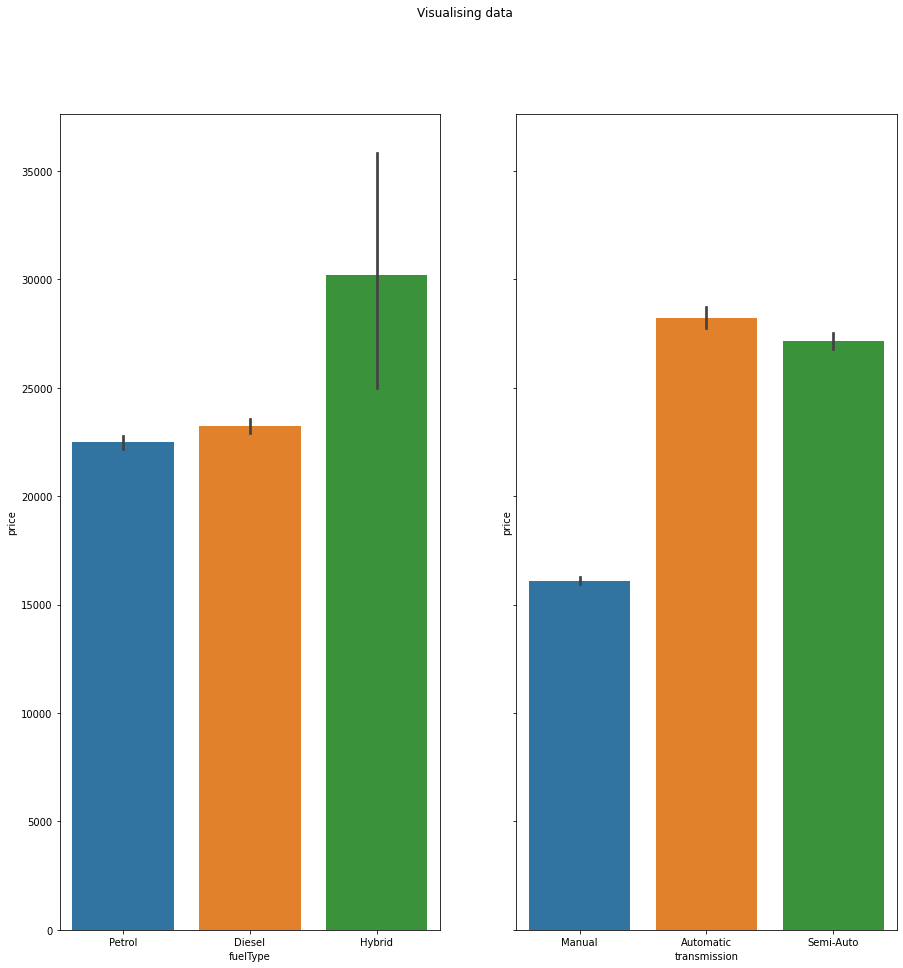

In [23]:
fig,axes = plt.subplots(1,2,figsize=(15,15),sharey=True)
fig.suptitle('Visualising data')
sns.barplot(x=fueltype,y=price,ax=axes[0])
sns.barplot(x=transmission,y = price,ax=axes[1])

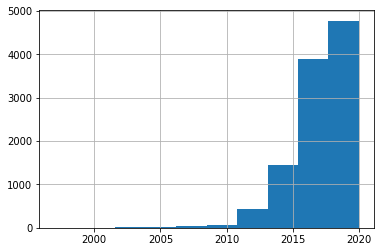

In [25]:
df['year'].hist()

Text(0.5, 1.0, 'car price distribution')

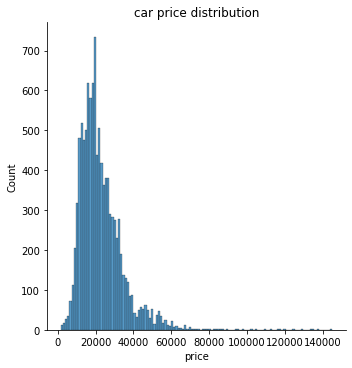

In [27]:
sns.displot(df.price)
plt.title("car price distribution")

<function matplotlib.pyplot.show>

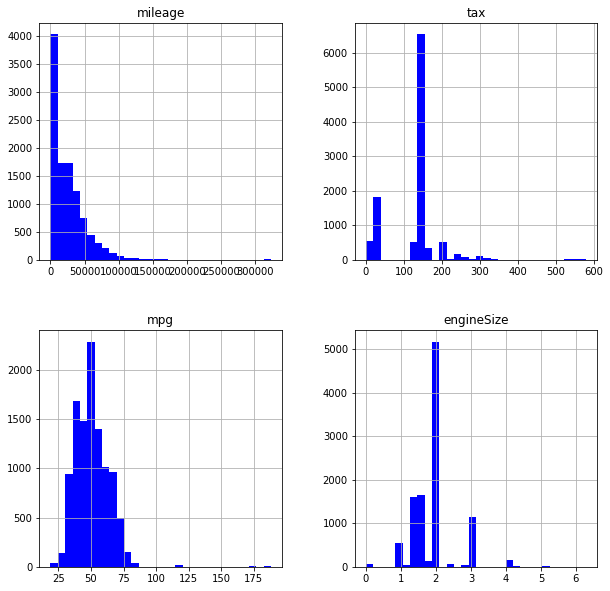

In [31]:
df[['mileage','tax','mpg','engineSize']].hist(bins=30,figsize=(10,10),color='blue')
plt.show

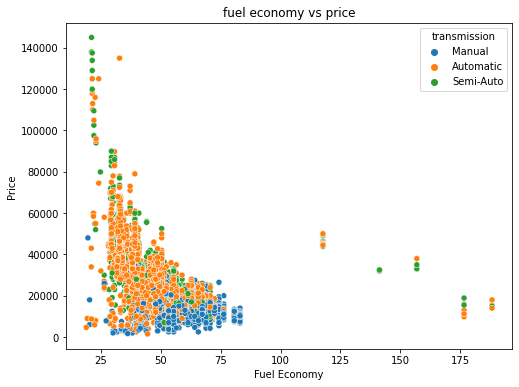

In [32]:
plt.figure(figsize=(8,6))
plt.title('fuel economy vs price')
sns.scatterplot(x=df['mpg'],y=df['price'],hue=df['transmission'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

In [33]:
df.replace({'transmission':{'Manual':0,'Automatic':1,'Semi-Auto':2}},inplace=True)
df.replace({'fuelType':{'petrol':0,'Diesel':1,'Hybrid':3}})

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,1,36203,1,20,64.2,2.0
2,A1,2016,11000,0,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,1,25952,1,145,67.3,2.0
4,A3,2019,17300,0,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,0,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,0,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,0,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,1,8646,Petrol,150,47.9,1.4


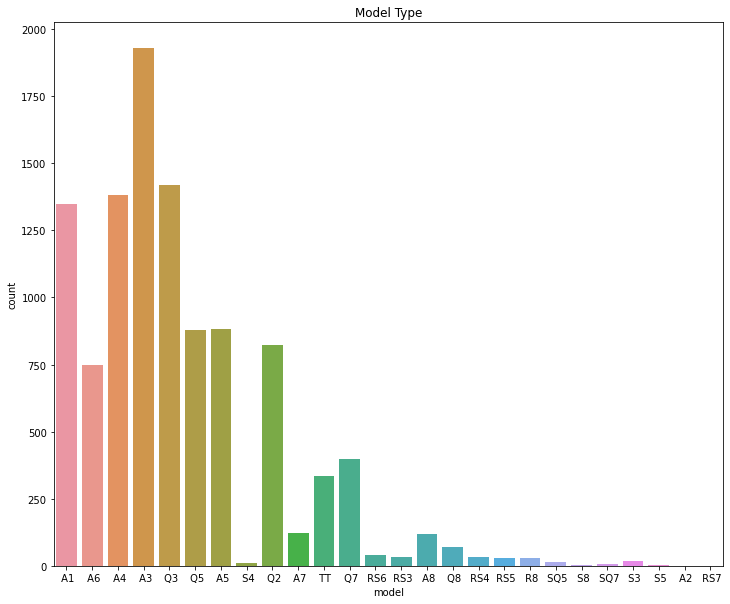

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(x='model',data=df)
plt.title('Model Type')
plt.show()

In [36]:
modified_df = df.drop('model',axis=1)
modified_df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,0,15735,Petrol,150,55.4,1.4
1,2016,16500,1,36203,Diesel,20,64.2,2.0
2,2016,11000,0,29946,Petrol,30,55.4,1.4
3,2017,16800,1,25952,Diesel,145,67.3,2.0
4,2019,17300,0,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,2020,16999,0,4018,Petrol,145,49.6,1.0
10664,2020,16999,0,1978,Petrol,150,49.6,1.0
10665,2020,17199,0,609,Petrol,150,49.6,1.0
10666,2017,19499,1,8646,Petrol,150,47.9,1.4


In [37]:
df.corr()

,year,price,transmission,mileage,tax,mpg,engineSize
year,1.000000,0.592581,0.254572,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,0.418419,-0.535357,0.356157,-0.600334,0.591262
transmission,0.254572,0.418419,1.000000,-0.205680,0.306599,-0.336363,0.340522
mileage,-0.789667,-0.535357,-0.205680,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,0.306599,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,-0.336363,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.340522,0.070710,0.393075,-0.365621,1.000000


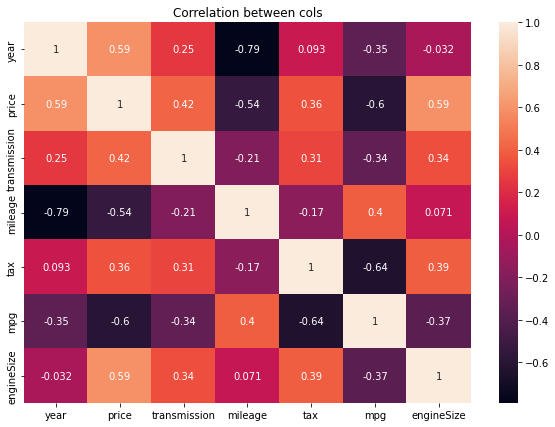

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between cols")
plt.show()

In [41]:
df.corr()['price'].sort_values(ascending=False)

price           1.000000
year            0.592581
engineSize      0.591262
transmission    0.418419
tax             0.356157
mileage        -0.535357
mpg            -0.600334
Name: price, dtype: float64

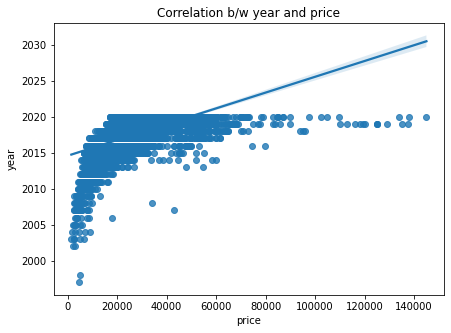

In [42]:
fig = plt.figure(figsize=(7,5))
plt.title("Correlation b/w year and price")
sns.regplot(x='price',y='year',data=df)